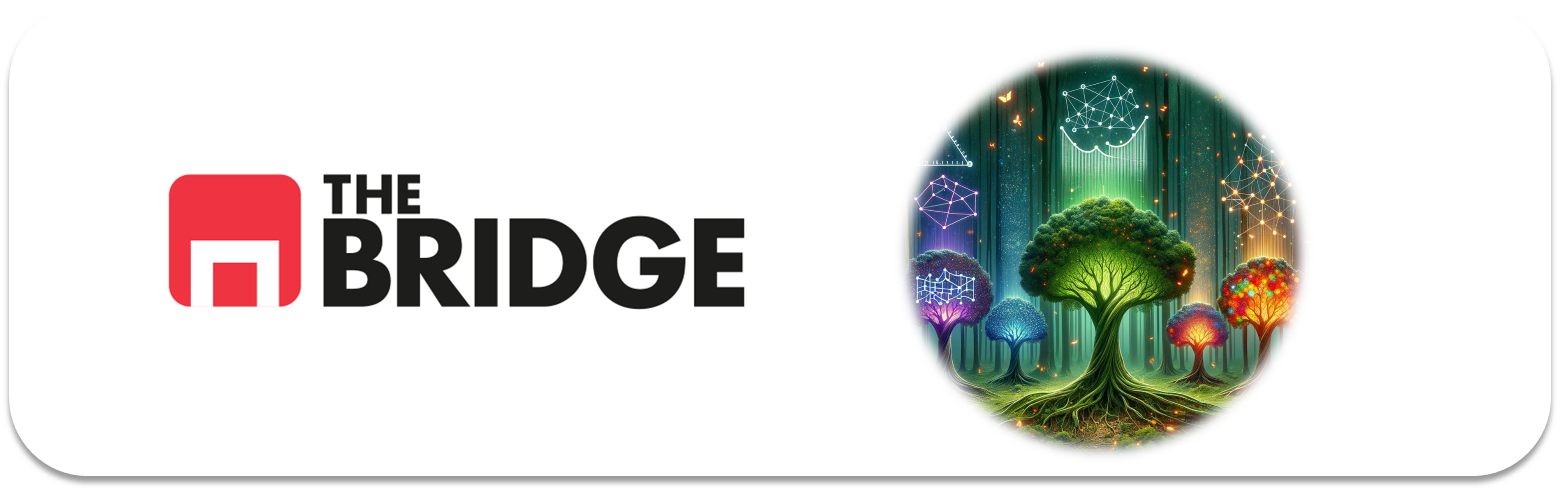

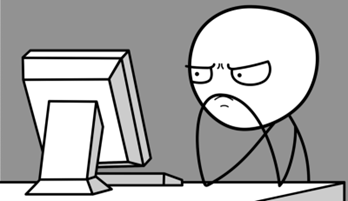

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


### Ejercicio 1

Importa el csv "temps.csv"

In [3]:
df_temps = pd.read_csv("data/temps.csv")


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [5]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:
# Realizar one-hot encoding de las variables categóricas
df_temps_encoded = pd.get_dummies(df_temps, columns=['week'])

# Mostrar las primeras filas del DataFrame codificado
df_temps_encoded.head(4)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False


### Ejercicio 3

Divide en train y test

In [9]:
from sklearn.model_selection import train_test_split

# Separar las características (variables independientes) y la variable objetivo (variable dependiente)
X = df_temps_encoded.drop('actual', axis=1)
y = df_temps_encoded['actual']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% de entrenamiento y 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (278, 17)
Forma de y_train: (278,)
Forma de X_test: (70, 17)
Forma de y_test: (70,)


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el DecisionTreeRegressor con hiperparámetros por defecto
tree_regressor = DecisionTreeRegressor()

# Entrenar el modelo en los datos de entrenamiento
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [18]:
prediccion= tree_regressor.predict(X_test)
error= abs(y_test-prediccion)
print(f"MAE: {np.mean(error)}")

MAE: 4.771428571428571


In [19]:
from sklearn.metrics import mean_absolute_error

# Predecir los valores de temperatura para el conjunto de prueba
y_pred = tree_regressor.predict(X_test)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Mostrar el MAE
print("Error Absoluto Medio (MAE):", mae)


Error Absoluto Medio (MAE): 4.771428571428571


en promedio, las predicciones del modelo difieren en aproximadamente 4.77 unidades de los valores reales.

### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [20]:
print('MAPE:',np.round(100*np.mean(error/y_test),2),'%')

MAPE: 7.48 %


las predicciones del modelo están desviadas del valor real en aproximadamente el 7.48%.

### Ejercicio 7

Representa el árbol de decision

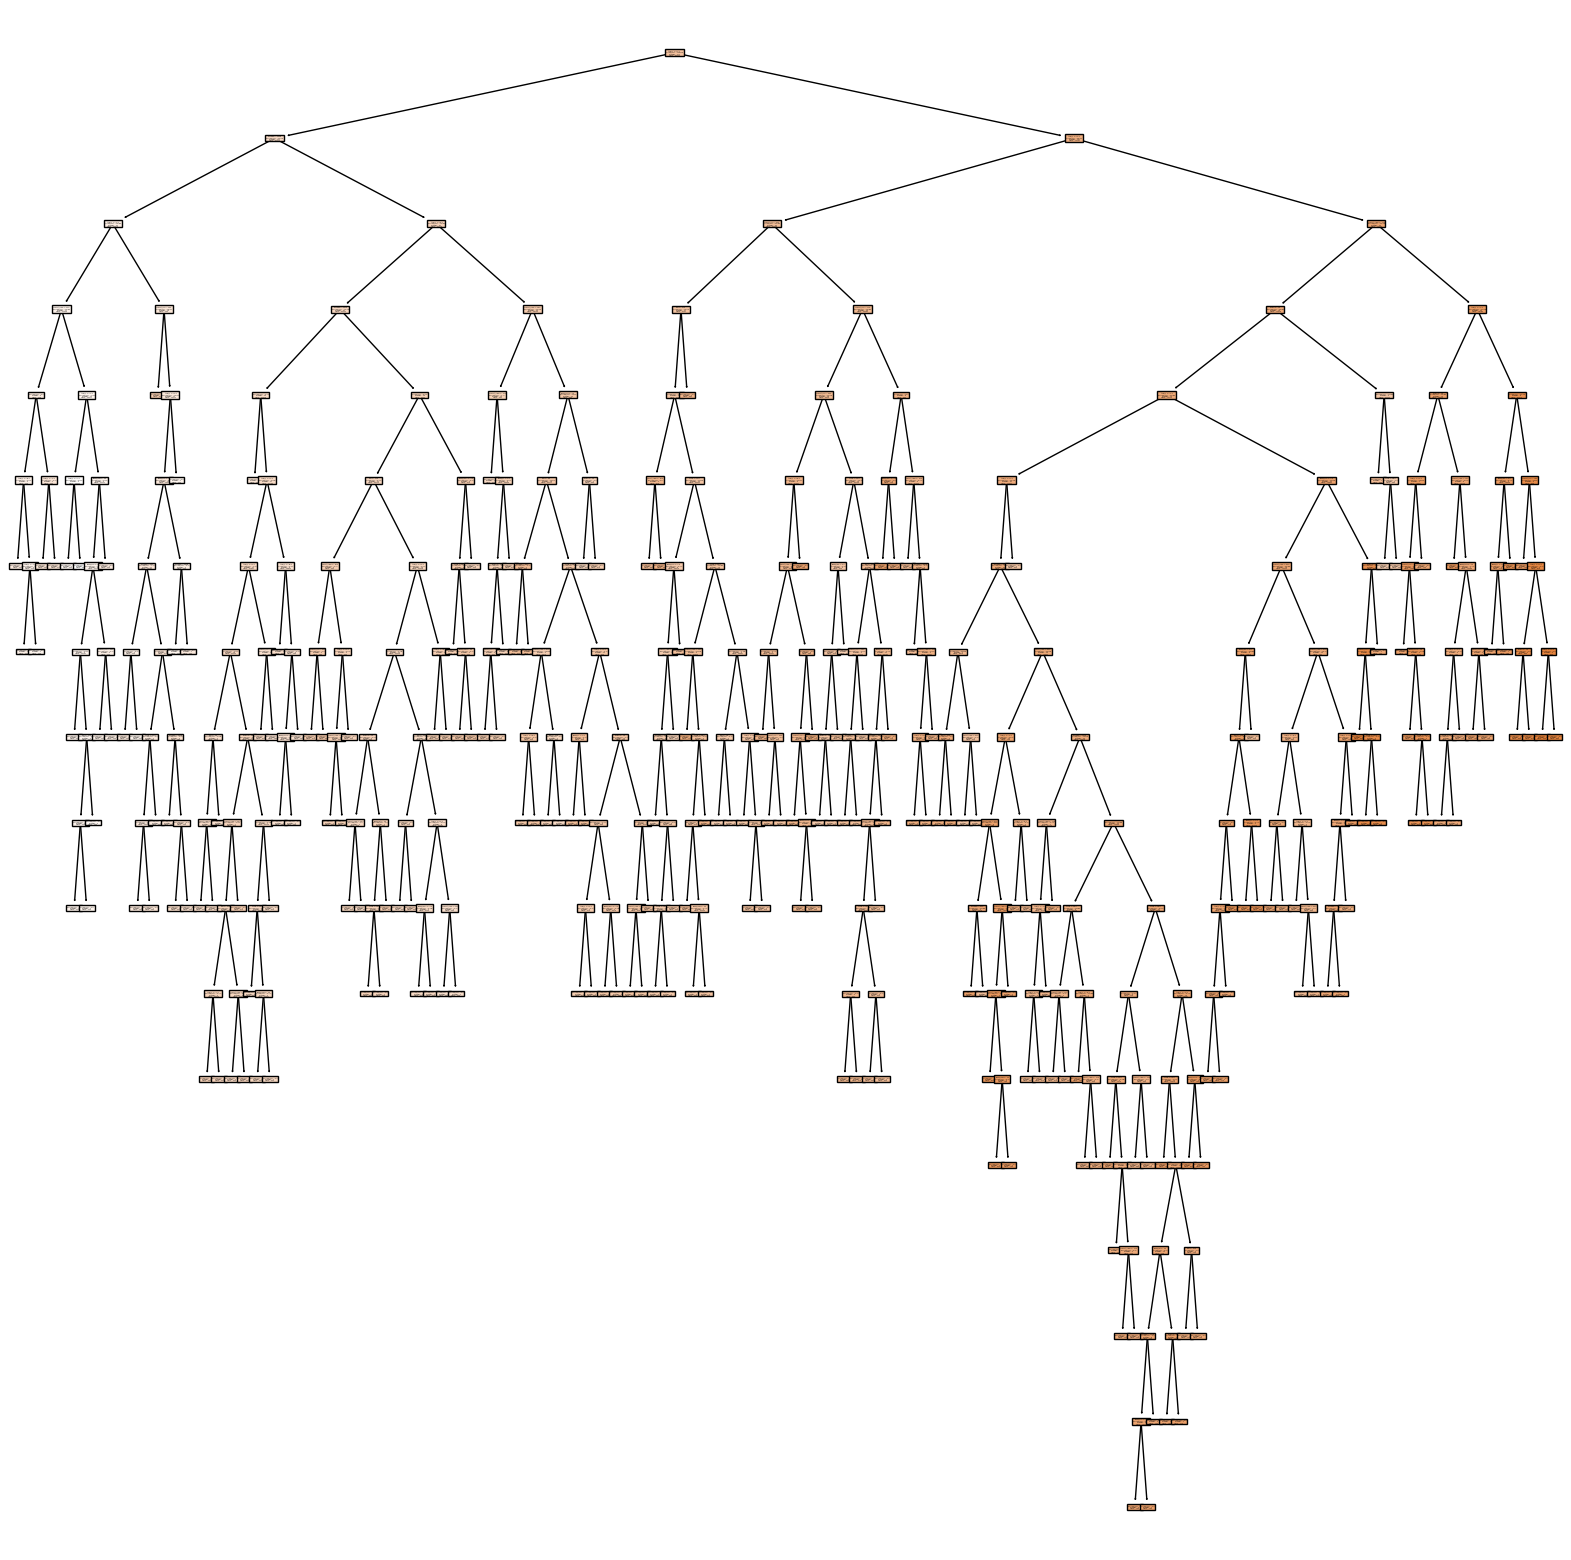

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(tree_regressor, feature_names=X.columns, class_names=['actual'], filled=True)
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [26]:
# Instanciar un nuevo árbol de decisión con max_depth=3
tree_regressor_depth3 = DecisionTreeRegressor(max_depth=3)

# Entrenar el nuevo árbol de decisión en los datos de entrenamiento
tree_regressor_depth3.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [27]:
prediccion= tree_regressor_depth3.predict(X_test)
error_depth3= abs(y_test-prediccion)
print(f"MAE: {np.mean(error_depth3)}")


print('MAPE:',np.round(100*np.mean(error_depth3/y_test),2),'%')

MAE: 4.424444494299118
MAPE: 6.94 %


### Ejercicio 10

Vuelve a representar su árbol

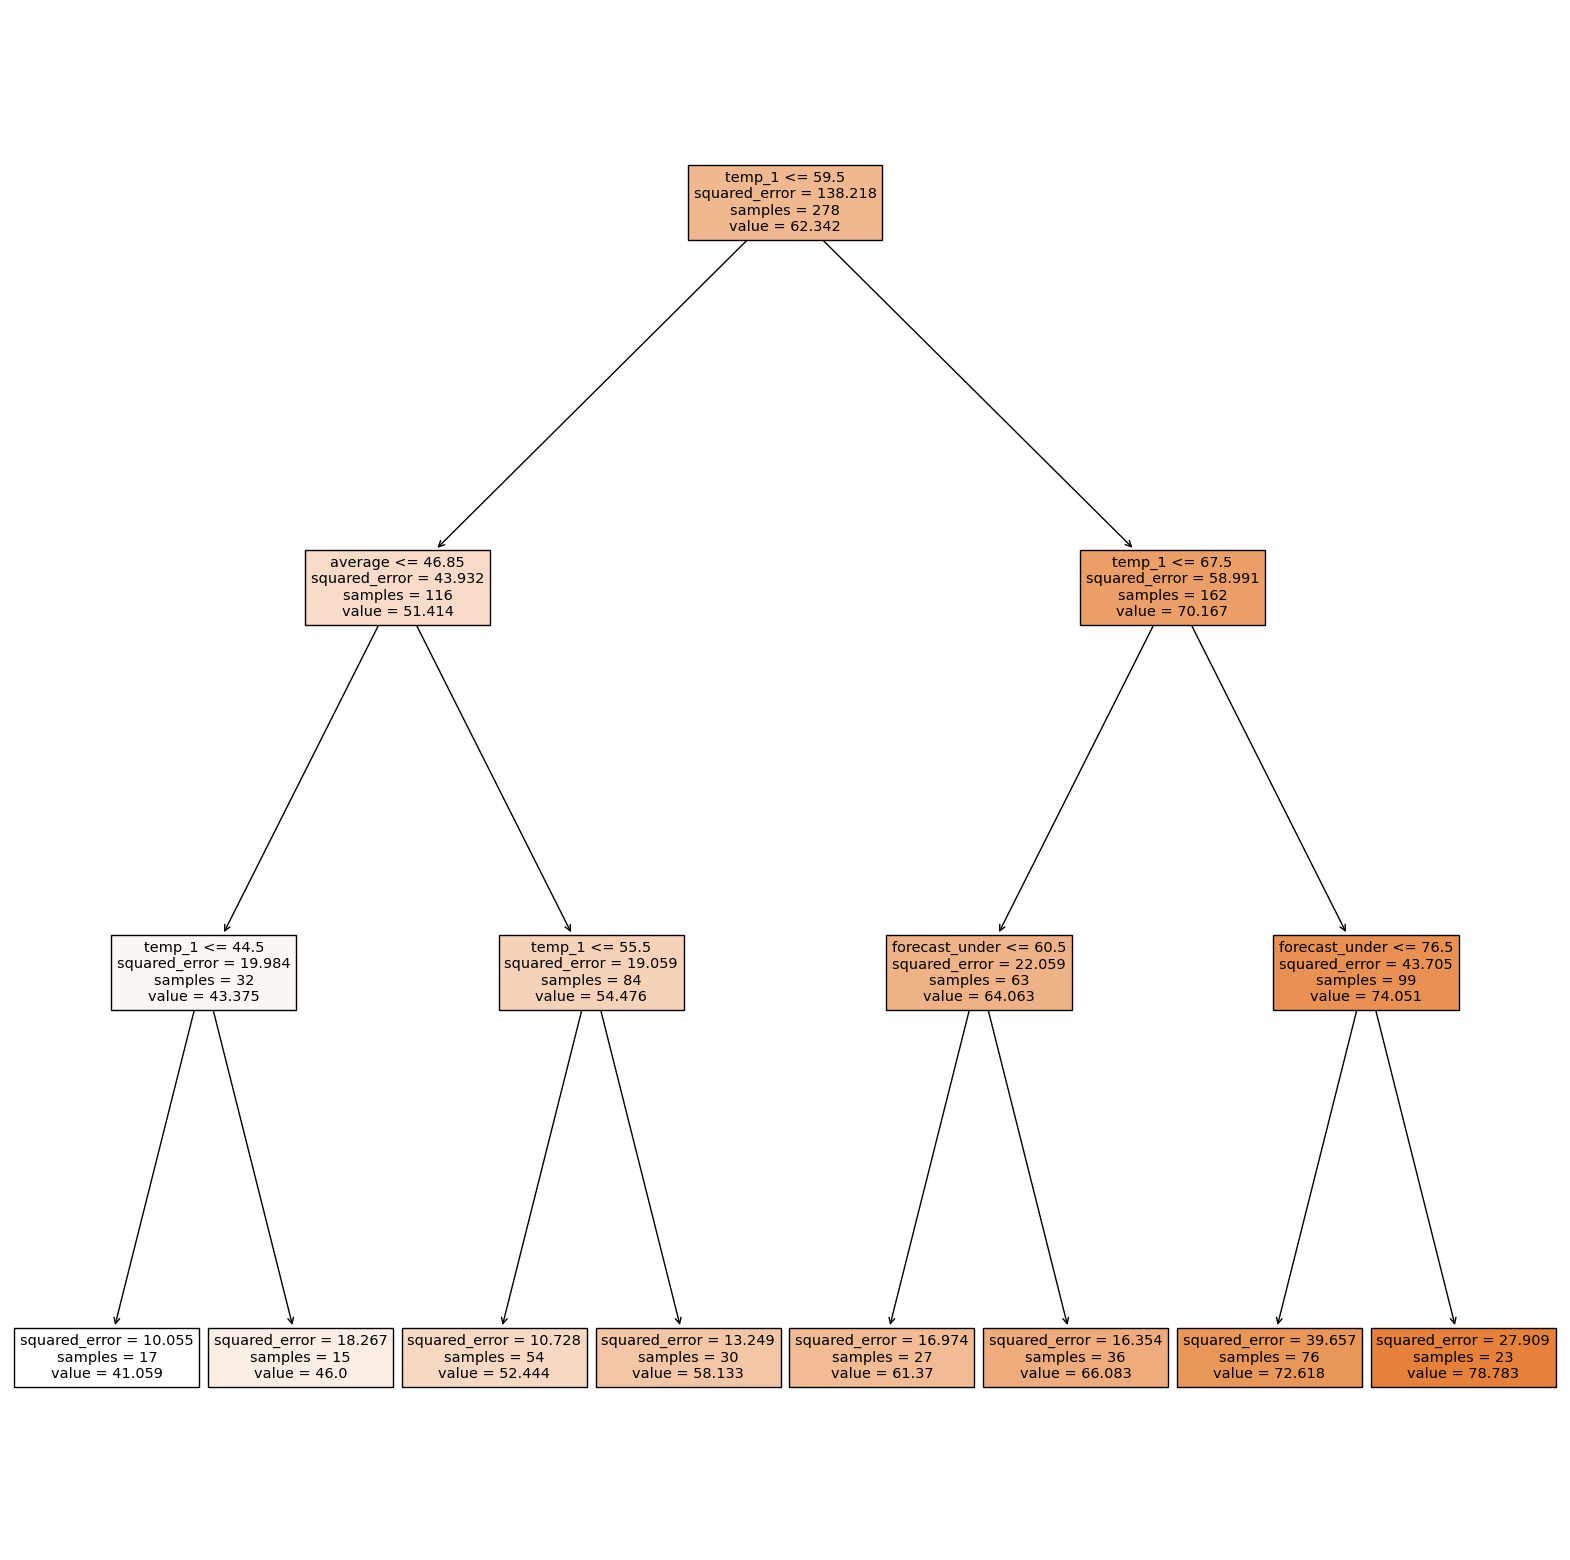

In [28]:
plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(tree_regressor_depth3, feature_names=X.columns, class_names=['actual'], filled=True)
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [30]:
pd.DataFrame({'features':X.columns,
              'importance':tree_regressor_depth3.feature_importances_}).sort_values('importance',
                                                                  ascending=False)

,features,importance
4,temp_1,0.880208
5,average,0.088412
8,forecast_under,0.031381
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000


In [29]:
# Obtener la importancia de las características del último modelo
importances = tree_regressor_depth3.feature_importances_

# Mostrar la importancia de cada característica
for feature, importance in zip(X.columns, importances):
    print(f"Importancia de '{feature}': {importance}")


Importancia de 'year': 0.0
Importancia de 'month': 0.0
Importancia de 'day': 0.0
Importancia de 'temp_2': 0.0
Importancia de 'temp_1': 0.8802075128034851
Importancia de 'average': 0.08841158765377367
Importancia de 'forecast_noaa': 0.0
Importancia de 'forecast_acc': 0.0
Importancia de 'forecast_under': 0.03138089954274133
Importancia de 'friend': 0.0
Importancia de 'week_Fri': 0.0
Importancia de 'week_Mon': 0.0
Importancia de 'week_Sat': 0.0
Importancia de 'week_Sun': 0.0
Importancia de 'week_Thurs': 0.0
Importancia de 'week_Tues': 0.0
Importancia de 'week_Wed': 0.0
